In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, cv2
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#why: label Q제거 + int 변환
file_path = "/content/drive/MyDrive/YANG/unzip/images/resize"

data = []

for food_folder in tqdm(os.listdir(file_path)):
    food_folder_path = os.path.join(file_path, food_folder)

    for q_folder in os.listdir(food_folder_path):
        q_folder_path = os.path.join(food_folder_path, q_folder)

        # 'Q' 제거 후에 정수로 변환
        quantity_nnn = int(q_folder.split('/')[-1].replace("Q", ""))

        for img_file in os.listdir(q_folder_path):
            if img_file.endswith(".jpg"):
                filename = img_file
                filepath = os.path.join(q_folder_path, img_file)

                data.append({"filename": filename, "filepath": filepath, "quantity": quantity_nnn})

100%|██████████| 83/83 [01:55<00:00,  1.39s/it]


In [5]:
#quantity 확인하기
data

[{'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00001_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00001_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00002_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00002_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00003_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00003_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00004_resized.jpg',
  'filepath': '/content/drive/MyDrive/YANG/unzip/images/resize/갈비탕/Q1/crop_side_건더기국류_뚝배기_갈비탕_Q1_00004_resized.jpg',
  'quantity': 1},
 {'filename': 'crop_side_건더기국류_뚝배기_갈비탕_Q1_00005_

In [6]:
#data np.array 변환 -> X
X = []

for item in tqdm(data):
  img = cv2.imread(item['filepath'])
  X.append(img)

X = np.array(X)
print("X shape:", X.shape)

100%|██████████| 40754/40754 [2:55:59<00:00,  3.86it/s]


X shape: (40754, 224, 224, 3)


In [7]:
#data np.array 변환 -> y
y = []

for item in tqdm(data):
  y.append(item['quantity'])

y = np.array(y)
print("y shape:", y.shape)

100%|██████████| 40754/40754 [00:00<00:00, 2145695.24it/s]

y shape: (40754,)


In [8]:
#나중을 위해 배열 정보 저장
# # 데이터를 저장
# np.save('/content/drive/MyDrive/2.양추정/X_data.npy', X)
# np.save('/content/drive/MyDrive/2.양추정/y_data.npy', y)

In [3]:
# 데이터를 불러오기
X_loaded = np.load('/content/drive/MyDrive/2.양추정/X_data.npy')
y_loaded = np.load('/content/drive/MyDrive/2.양추정/y_data.npy')

print("X_loaded shape:", X_loaded.shape)
print("y_loaded shape:", y_loaded.shape)

X_loaded shape: (40754, 224, 224, 3)
y_loaded shape: (40754,)


In [6]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_loaded, y_loaded, test_size=0.2, shuffle=True, stratify=y_loaded, random_state=123)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (32603, 224, 224, 3) (32603,)
test 데이터 크기: (8151, 224, 224, 3) (8151,)


In [7]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

uint8
uint8
int64
int64


In [9]:
X_loaded

array([[[[242, 237, 236],
         [242, 237, 236],
         [242, 237, 236],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[242, 237, 236],
         [242, 237, 236],
         [242, 237, 236],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[242, 237, 236],
         [242, 237, 236],
         [242, 237, 236],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [243, 238, 239],
         [247, 241, 242],
         [243, 237, 238]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [241, 236, 237],
         [237, 233, 232],
         [247, 243, 242]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [242, 237, 238],
        

In [10]:
y_loaded

array([1, 1, 1, ..., 5, 5, 5])

In [13]:
a = np.unique(y_loaded)
a

array([1, 2, 3, 4, 5])

In [18]:
# #y(라벨) 인코딩  -> 이 방법 아님
# Y = to_categorical(y)
# Y

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
#y(라벨) 인코딩
YY = pd.get_dummies(y_loaded)
YY

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
40749,False,False,False,False,True
40750,False,False,False,False,True
40751,False,False,False,False,True
40752,False,False,False,False,True


In [20]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_loaded, YY, test_size=0.2, shuffle=True, stratify=YY, random_state=123)

print("train 데이터 크기:", X_train.shape, y_train.shape)
print("test 데이터 크기:", X_test.shape, y_test.shape)

train 데이터 크기: (32603, 224, 224, 3) (32603, 5)
test 데이터 크기: (8151, 224, 224, 3) (8151, 5)


In [27]:
#모델 설정-no.1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#patience=5 검증손실 50번 연속 개선되지 않으면 멈추기
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=128, verbose=1, callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 64)       

In [30]:
#모델 설정-no.2
import keras

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(5, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#patience=5 검증손실 5번 연속 개선되지 않으면 멈추기
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=128, verbose=1, callbacks=[early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 flatten_3 (Flatten)         (None, 774400)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               99123328  
                                                      

KeyboardInterrupt: 

In [21]:
import tensorflow as tf
#SGD는 TensorFlow와 Keras에서 기본적으로 제공되는 옵티마이저 중 하나
#확률적 경사 하강법(Stochastic Gradient Descent)의 한 종류로, 가장 기본적인 옵티마이저 중 하나
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 과적합 방지

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지
model.add(Dense(5, activation='softmax'))
model.summary()

#learning_rate(학습률):가중치를 얼마나 부여할지
#momentum:전 단계에서 이동한 방향을 기억하는데 사용, 0~1사이 값 가지며 0.9를 보통 사용
#nesterov:재 위치에서 기울기를 계산하는 대신 모멘텀의 방향으로 약간 미래의 위치에서 기울기를 계산, 일반적으로 False로 설정, True면 활성화
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)
model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/100
192/192 [==============================] - 433s 2s/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.1997
Epoch 2/100
192/192 [==============================] - 408s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 3/100
192/192 [==============================] - 439s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 4/100
192/192 [==============================] - 445s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 5/100
192/192 [==============================] - 415s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 6/100
192/192 [==============================] - 445s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 7/100
192/192 [==============================] - 424s 2s/step - loss: nan - accuracy: 0.2003 - val_loss: nan - val_accuracy: 0.1997
Epoch 8/100


KeyboardInterrupt: 

In [23]:
y_predict = model.predict(X_test)
y_pred = (y_predict > 0.5).astype(int)
y_pred_list = y_pred.flatten().tolist()
print(f'예측값 : {y_pred_list[:20]}')

255/255 [==============================] - 34s 134ms/step
예측값 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


NameError: name 'history' is not defined

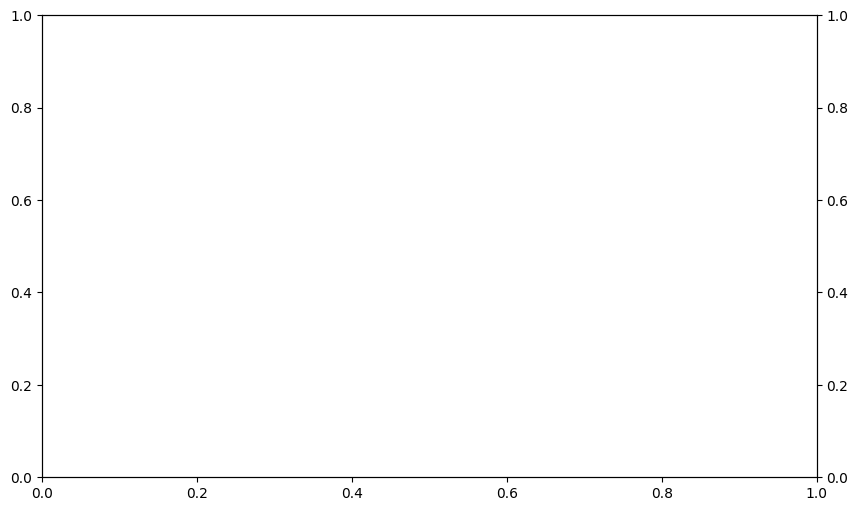

In [28]:
# 학습 그래프 그리기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,6))
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

acc_ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5))
loss_ax.legend(loc='lower left', bbox_to_anchor=(1.15, 0.5))

plt.grid()
plt.show()